# 0.) Import the Credit Card Fraud Data From CCLE

In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [303]:
df = pd.read_csv("fraudTest.csv")

In [304]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [305]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/6n/cdhdrjh95c7fy5mm45kx0_9m0000gn/T/ipykernel_28371/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/6n/cdhdrjh95c7fy5mm45kx0_9m0000gn/T/ipykernel_28371/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [306]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [307]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [308]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [309]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

In [310]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = .3)

In [311]:
X_test1, X_holdout1, y_test1, y_holdout1 = train_test_split(X_test, y_test, test_size = .5)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [312]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [313]:
ros = RandomOverSampler()
over_X, over_y = ros.fit_resample(X_train, y_train)

rus = RandomUnderSampler()
under_X, under_y = rus.fit_resample(X_train, y_train)

smote = SMOTE()
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [314]:
smote_X1, smote_y1 = smote.fit_resample(X_train1, y_train1)

In [315]:
len(y_train == 1)

389003

In [316]:
sum(y_train == 1)

1495

In [317]:
len(y_train==0)

389003

In [318]:
len(over_y)

775016

In [319]:
len(under_y)

2990

In [320]:
len(smote_y)

775016

# 3.) Train three logistic regression models

In [321]:
from sklearn.linear_model import LogisticRegression

In [322]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [323]:
over_log.score(X_test, y_test)

0.9231507473787759

In [324]:
under_log.score(X_test, y_test)

0.8977302718395355

In [325]:
smote_log.score(X_test, y_test)

0.9210393723457857

In [326]:
# We see SMOTE performing with higher accuracy but is ACCURACY really the best measure?

# 5.) Which performed best in Out of Sample metrics?

In [327]:
# Sensitivity here in credit fraud is more important as seen from last class

In [328]:
from sklearn.metrics import confusion_matrix

In [329]:
y_true = y_test

In [330]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76702,  6319],
       [   87,   250]])

In [331]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7418397626112759


In [332]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[74583,  8438],
       [   87,   250]])

In [333]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7418397626112759


In [334]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76526,  6495],
       [   87,   250]])

In [335]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7418397626112759


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [336]:
raw_temp = pd.concat([X_train1, y_train1], axis =1)

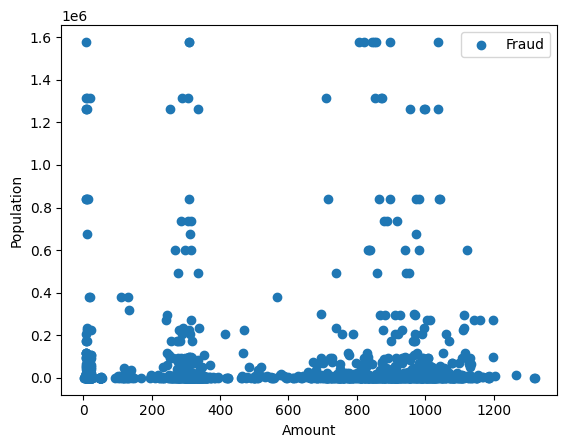

In [337]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])
plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")
plt.show()

In [338]:
raw_temp = pd.concat([smote_X1, smote_y1], axis =1)

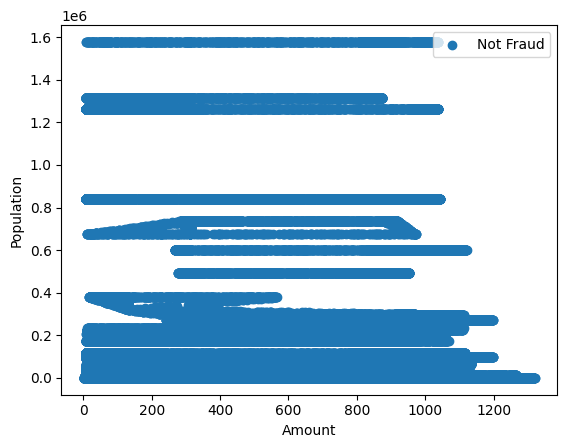

In [339]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1]["amt"], raw_temp[raw_temp["is_fraud"] == 1]["city_pop"])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [340]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [341]:
resampling_methods = {
    "over" : RandomOverSampler(), 
    "under" : RandomUnderSampler(), 
    "smote" : SMOTE()
}

model_configs = {
    "LOG" : LogisticRegression(), 
    "LASSO" :LogisticRegression(penalty="l1",
                               C=2., solver = "liblinear"), 
    "DTREE" : DecisionTreeClassifier()
}

In [348]:
def calc_perf_metric(y_true, y_pred):
    tn,fp,fn, tp = confusion_matrix(y_true,y_pred).ravel()
    
    sensitivity = tp / (tp+fn)
    specificity = tn / (tn+fp)
    precision = precision_score(y_true, y_pred), 
    recall = recall_score(y_true, y_pred), 
    f1 = f1_score(y_true, y_pred)
    
    return (sensitivity, specificity,precision, recall, f1)

In [343]:
trained_models ={}
results =[]

In [349]:
for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key =f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity,precision, recall, f1 = calc_perf_metric(y_true, y_pred)
        holdout= m.score(X_holdout, y_holdout)
        
        results.append({"Model" : combined_key, 
                       "Sensativity" : sensitivity, 
                       "Specificity" : specificity, 
                       "Precision" : precision, 
                       "Recall" : recall, 
                        "F1" : f1, 
                       "Holdout": holdout})
        print(combined_key)

over_LOG
over_LASSO
over_DTREE
under_LOG
under_LASSO
under_DTREE
smote_LOG
smote_LASSO
smote_DTREE


In [350]:
results_df = pd.DataFrame(results)

In [351]:
results_df 

,Model,Sensativity,Specificity,Precision,Recall,F1,Holdout
0,over_LOG,0.741840,0.923164,"(0.03771307889576105,)","(0.7418397626112759,)",0.071777,0.919108
1,over_LASSO,0.741840,0.923176,"(0.03771876885938443,)","(0.7418397626112759,)",0.071788,0.919132
2,over_DTREE,0.513353,0.998687,"(0.6134751773049646,)","(0.5133531157270029,)",0.558966,0.996977
3,under_LOG,0.741840,0.927067,"(0.03965107057890563,)","(0.7418397626112759,)",0.075279,0.923295
4,under_LASSO,0.741840,0.926669,"(0.039444619753865574,)","(0.7418397626112759,)",0.074906,0.922767
5,under_DTREE,0.958457,0.941388,"(0.06224706109076893,)","(0.9584569732937686,)",0.116902,0.943425
6,smote_LOG,0.741840,0.921417,"(0.03690581635665781,)","(0.7418397626112759,)",0.070314,0.917464
7,smote_LASSO,0.741840,0.921478,"(0.03693307726399764,)","(0.7418397626112759,)",0.070363,0.917500
8,smote_DTREE,0.679525,0.992954,"(0.28132678132678135,)","(0.6795252225519288,)",0.397915,0.992298
9,over_LOG,0.741840,0.922333,"(0.0373245744998507,)","(0.7418397626112759,)",0.071073,0.918388


Random Under Sampled Decision Tree performs the best in terms of the F-1 score and Holdout. The model has the highest rates of Precision and Recall indicating a high level of accuracy in the model's predictions. However, Sensativity and Specificity levels are the lowest.